In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Airport_Monthly_Operational_Report.csv')
focused = data[['Month',
                'Domestic Enplaned Passengers: Revenue',
                'Domestic Deplaned Passengers: Revenue',
                'International Enplaned Passengers: Revenue',
                'International Deplaned Passengers: Revenue',
                'International Enplaned Pre-Cleared Passengers: Revenue',
                'International Deplaned Pre-Cleared Passengers: Revenue',
                'South Terminal Domestic Enplaned Revenue',
                'South Terminal Domestic Deplaned Revenue']]
cleaned = focused.replace(np.nan,0)
cleaned['Total Passengers Revenue'] = np.sum(cleaned.iloc[:,1:],axis=1)
cleaned = cleaned.iloc[::-1]

In [3]:
cleaned

,Month,Domestic Enplaned Passengers: Revenue,Domestic Deplaned Passengers: Revenue,International Enplaned Passengers: Revenue,International Deplaned Passengers: Revenue,International Enplaned Pre-Cleared Passengers: Revenue,International Deplaned Pre-Cleared Passengers: Revenue,South Terminal Domestic Enplaned Revenue,South Terminal Domestic Deplaned Revenue,Total Passengers Revenue
80,06/01/2013 12:00:00 AM,449910.0,432328.0,4027.0,4167.0,0.0,0.0,0.0,0.0,890432.0
79,07/01/2013 12:00:00 AM,443865.0,443929.0,4202.0,4687.0,0.0,0.0,0.0,0.0,896683.0
78,08/01/2013 12:00:00 AM,412482.0,437804.0,2623.0,3534.0,0.0,0.0,0.0,0.0,856443.0
77,09/01/2013 12:00:00 AM,380599.0,386029.0,1127.0,1616.0,0.0,0.0,0.0,0.0,769371.0
76,10/01/2013 12:00:00 AM,423736.0,432451.0,1013.0,1241.0,0.0,0.0,0.0,0.0,858441.0
...,...,...,...,...,...,...,...,...,...,...
4,10/01/2019 12:00:00 AM,689021.0,700155.0,16516.0,18998.0,4380.0,4688.0,53784.0,55015.0,1542557.0
3,11/01/2019 12:00:00 AM,658192.0,641949.0,17514.0,16730.0,2908.0,2463.0,44136.0,43874.0,1427766.0
2,12/01/2019 12:00:00 AM,676495.0,657508.0,18437.0,17424.0,2513.0,1972.0,35524.0,34731.0,1444604.0
1,01/01/2020 12:00:00 AM,575807.0,595321.0,12391.0,13958.0,2026.0,1886.0,23804.0,25744.0,1250937.0


In [4]:
fraction= pd.DataFrame(cleaned['Month'])
for i in range(1,cleaned.shape[1]-1):
    fraction[i] = cleaned.iloc[:,i]/cleaned['Total Passengers Revenue']

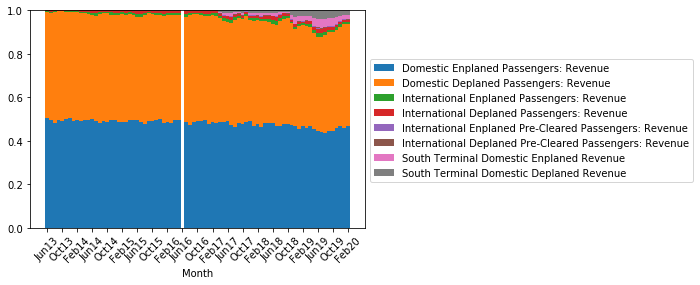

In [5]:
legend = []
p = plt.bar(fraction.iloc[:,0],fraction.iloc[:,1],width=1)
bottom = fraction.iloc[:,1].copy()
legend.append(p[0])
for col in range(2,fraction.shape[1]):
    p = plt.bar(fraction.iloc[:,0],fraction.iloc[:,col],bottom=bottom,width=1)
    bottom += fraction.iloc[:,col]
    legend.append(p[0])
plt.xticks(np.arange(0,81,4),['Jun13','Oct13','Feb14',
                              'Jun14','Oct14','Feb15',
                              'Jun15','Oct15','Feb16',
                              'Jun16','Oct16','Feb17',
                              'Jun17','Oct17','Feb18',
                              'Jun18','Oct18','Feb19',
                              'Jun19','Oct19','Feb20'], rotation=45)
plt.xlabel('Month')
plt.legend(legend, ('Domestic Enplaned Passengers: Revenue',
                    'Domestic Deplaned Passengers: Revenue',
                    'International Enplaned Passengers: Revenue',
                    'International Deplaned Passengers: Revenue',
                    'International Enplaned Pre-Cleared Passengers: Revenue',
                    'International Deplaned Pre-Cleared Passengers: Revenue',
                    'South Terminal Domestic Enplaned Revenue',
                    'South Terminal Domestic Deplaned Revenue'),loc='best', bbox_to_anchor=(1, 0.8))
plt.show()